# PR Statistik

### Objective PR nya

    1. Apa yang bisa Anda temukan mengenai data itu? Informasi apa yang menarik (30 point)
    2. Variabel apa yang paling memberikan pengaruh bahwa seseorang akan diterima di universitas? Berikan saran kepada para siswa di masa yang akan datang ya (70 point)
   

### Mari kita kerjakan..

In [1]:
# Kita import dulu packages-nya

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Kita import datasetnya

df = pd.read_csv('9_august_2020/soal_pr_statistik.csv', sep=';')

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Biar ga bingung, kita bahas variabel datanya dulu yuk..

Kalo diliat dari datanya, kayanya ini data calon mahasiswa S2 di LP3i.

- **Serial No.** : Ini ya nomer calon yang apply, mungkin nomer formulir pendaftaran gitu.
- **GRE Score** : *Graduate Record Examination*. Semacam hasil test, mungkin kaya UMPTN nya gitu.
- **TOEFL Score** : Test bahasa Inggris.
- **University Rating** : Mungkin adalah rating universitas pas S1 nya. Akreditasi kampusnya dulu.
- **SOP** : *Schollarship Oppurtunities Program*. Kemungkinan calon siswanya dapet beasiswa.
- **LOR** : *Letter of Recomendation*. Seberapa direkomendasiin si calon siswa sama kampus sebelumnya atau tempat dia pernah kerja.
- **CGPA** : *Cumulative Grade Points Average*. Kalo di sini tu IPK.
- **Research** : Pernah melakukan penelitian berapa kali.
- **Chance of Admit** : Berapa persen kemungkinan keterima di kampus tercinta **LP3i**.

In [3]:
# Cek info dari variable datanya untuk melihat type data dan apakah ada null value dari data tersebut

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
# Wah, asik nih, mas Fiqry baik banget, dikasih datanya bersih, ga ada null value.
# Tapi, nama kolom nya agak kurang asik nih, susah nanti diutak-atiknya. Jadi kita ganti dulu namanya ya..

df_baru = df.rename(columns = {"Serial No." : "SerialNo",
                               "GRE Score" : "GRE",
                               "TOEFL Score" : "TOEFL",
                               "University Rating" : "UniRating",
                               "SOP" : "SOP",
                               "LOR " : "LOR",
                               "Research" : "Research",
                               "Chance of Admit " : "Chance"})
df_baru.head()

,SerialNo,GRE,TOEFL,UniRating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Data Exploration

Yang pertama mau kita lihat adalah apakah memiliki nilai **GRE, TOEFL, UniRating, SOP, LOR, CGPA, dan Research** yang tinggi berpengaruh pada angka kemungkinan calon-calon siswa ini diterima di kampus kita tercinta **LP3i**?

In [5]:
def ChanceChart(a):
    
    # Kita lihat berapa rata-rata Chance di tiap variabel-nya.
    ratarata = df_baru.groupby(a).sum() / df_baru.groupby(a).count()
    
    # Kita isolasi datanya hingga yang muncul hanya variabel dan rata-rata Chance.
    data_var_chance = ratarata.Chance
    
    # Kita ubah data yang sudah kita dapat ke dalam bentuk DataFrame
    df_chance = pd.DataFrame(data=data_var_chance)
    
    # Fungsi bar chart
    df_chance.plot(kind='bar', figsize=(15,5))
    plt.show()

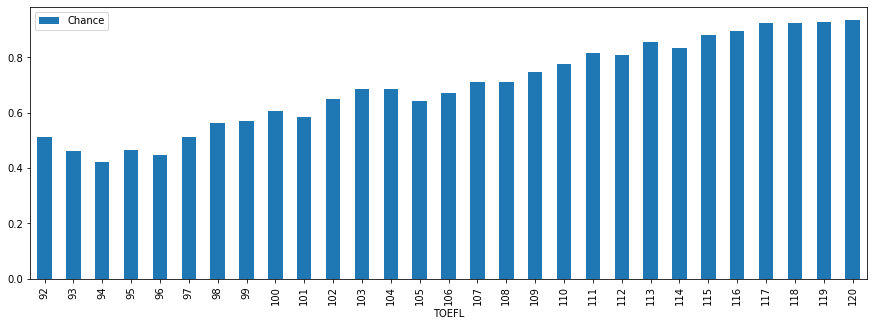

In [6]:
ChanceChart("TOEFL")

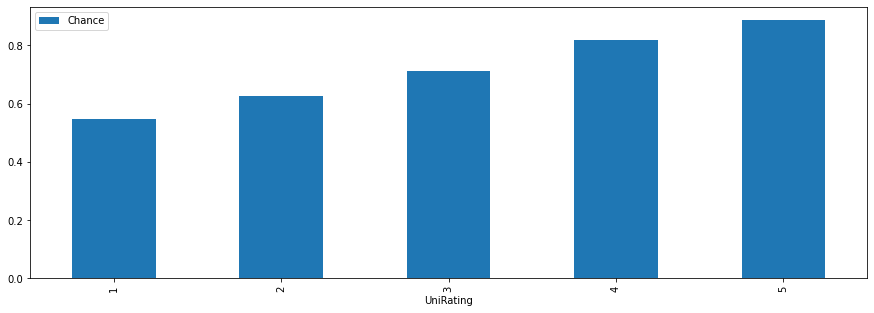

In [7]:
ChanceChart("UniRating")

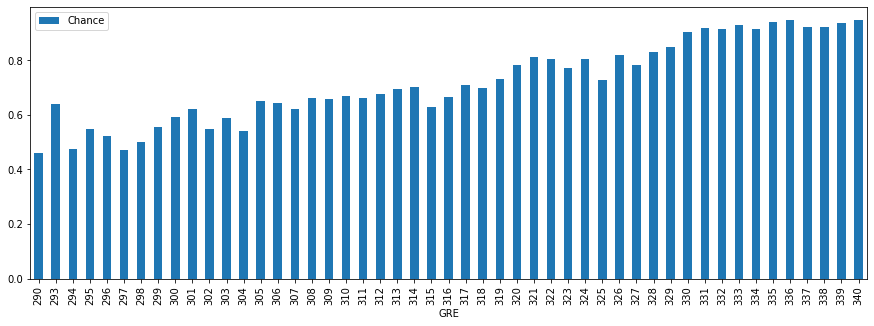

In [8]:
ChanceChart("GRE")

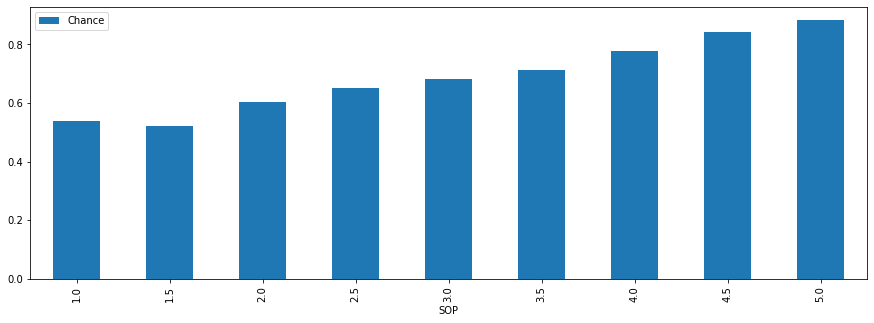

In [9]:
ChanceChart("SOP")

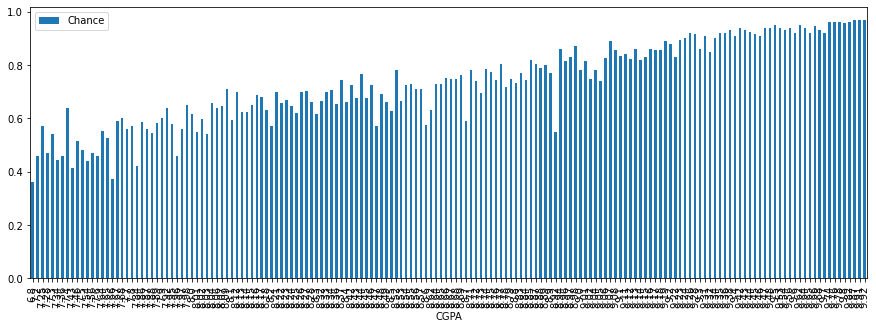

In [10]:
ChanceChart("CGPA")

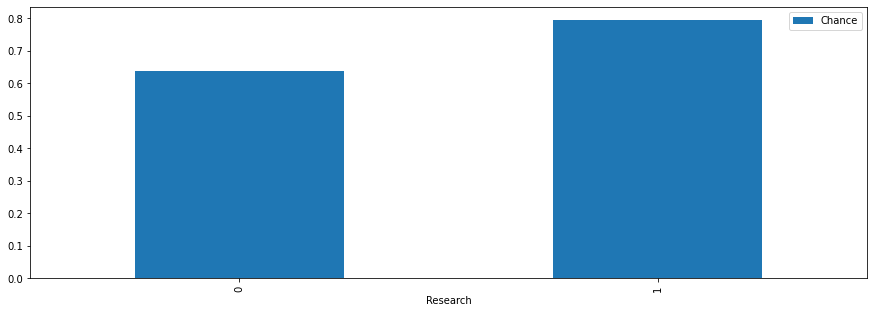

In [11]:
ChanceChart("Research")

Kalau melihat chart-chart di atas, sekilas dapat kita simpulkan bahwa semakin tinggi nilai **GRE, TOEFL, UniRating, SOP, LOR, CGPA, dan Research** semakin tinggi pula kemungkinan calon siswa tersebut diterima di **Program Pasca Sarjana LP3i**.

Berikutnya mari kita lihat korelasi antar variabelnya.

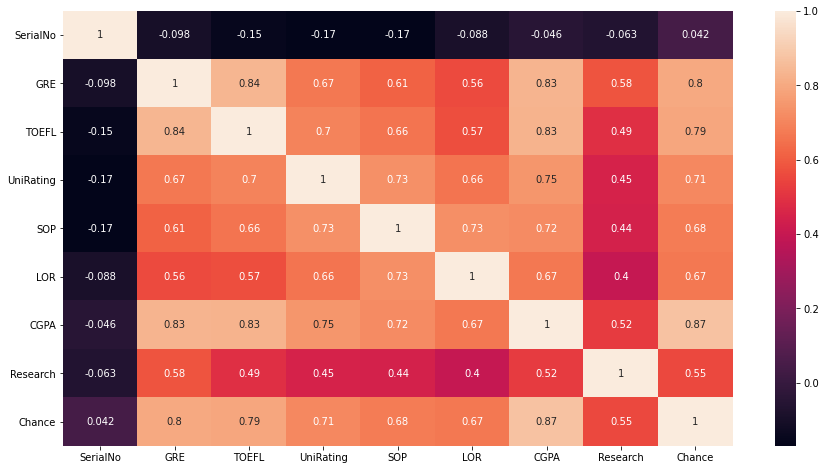

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df_baru.corr(),annot=True)
plt.show()

Dari heatmap di atas dapat kita simpulkan :
    
1. Bahwa variabel **SerialNo** adalah variabel yang ga ada korelasinya. Yaiyalah ya, sejak kapan nomer formulir jadi parameter calon siswa bisa diterima, apalagi ini di kampus tercinta kita **LP3i**.
2. Variabel lain memiliki korelasi yang cukup kuat, dilihat dari angka heatmap sebagian besar di atas **0,6**.
3. Variabel yang kurang memiliki korelasi adalah antara Research dengan angka korelasi berikisar di **0,4-0,58**

### Modelling

Tujuan modelling kali ini adalah untuk mencari variabel mana yang berperan dalam kemungkinan calon mahasiswa diterima di kampus tercinta **LP3i**

In [13]:
# Mari kita import modelnya dulu

from sklearn.preprocessing import StandardScaler

In [14]:
# Mari kita tentukan **y** nya.
# Yang kita cari adalah kemungkinan calon mahasiswa tersebut diterima di kampus LP3i. Maka y ditentukan dengan :

y = df_baru["Chance"]

In [19]:
# Kita tentukan X nya
# Dari hasil eksplorasi data, kita mendapatkan variabel yang memiliki korelasi kuat dan yang tidak.
# Maka kita dapat menentukan Feature apa saja yang kita gunakan dalam modeling kali ini.

Feature = ["GRE", "TOEFL", "UniRating", "SOP", "LOR", "CGPA", "Research"]

# Mendefinisikan nilai X
X = df_baru[Feature]

X.head()

,GRE,TOEFL,UniRating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [20]:
# Dilihat dari value yang belum seimbang, maka kita perlu melakukan Scaler terlebih dahulu.

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data)
scaled_df.columns = X.columns
scaled_df.head()

,GRE,TOEFL,UniRating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975


##### Regression Modelling

In [21]:
# Kita coding-coding dulu

X_added = sm.add_constant(X)
linreg = sm.OLS(y,X_added)
model = linreg.fit()

In [22]:
# Yash, mari kita lihat Regression Results nya

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Chance   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Wed, 12 Aug 2020   Prob (F-statistic):          3.12e-134
Time:                        15:23:23   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2594      0.125    -10.097      0.0

 ### Kesimpulan
 
 Dari data di atas dan hasil utak-atiknya, maka bisa kita lihat bahwa :
 
 1. Nilai **CGPA** merupakan faktor yg paling besar dalam menentukan diterima atau tidaknya calon siswa. 